<img src="slike/linreg_1.jpg" width=600/>

# Nadzorovano učenje


Scenarij pri metodah <i>nadzorovanega modeliranja</i> je pogosto naslednji. Podatki so predstavljeni s pari

$$ {(\vec{x}_1, y_1), (\vec{x}_2, y_2), ... (\vec{x}_n, y_n)} $$

kjer $\vec{x}_i$ imenujemo <i>neodvisne</i>, $y_i$ pa <i>odvisne</i> spremenljivke.  Zanima nas <i>preslikava</i> $h(\vec{x})$, ki vrednostim neodvisne spremenljivke slika v odvisne, z napako $\epsilon_i$. Torej,

$$ y_i = h(\vec{x_i}) + \epsilon_i $$ 

Spremenljivke $\vec{x}_i$, $y$ so v splošnem lahko zvezne, diskretne in druge. Preslikava $h(\vec{x})$ predstavlja <i>model</i> podatkov. Preslikava je lahko poljubna matematična funkcija (ali tudi algoritem, program), ki je odvisna od enega ali več <i>parametrov</i>. 

Strojno učenje pogosto pojmujemo kot iskanje parametrov (ali kar funkcije same) tako, da bo napaka $\epsilon_i$ karseda majhna. 

<br/>
<br/>
<br/>

<img src="slike/linreg_2.png" width=600/>

## Linearna regresija

Linearna regresija je primer enostavnega modela, kjer predpostavljamo:
* tako odvisne kot neodvisne spremenljivke so realna števila
* odvisna spremljivka je linearna kombinacija neodvisnih 
* napaka $\epsilon$ je normalno porazdeljena z upanjem $\mu_{\epsilon}=0$ in neznano varianco

Odvisne spremenljivke so v splošnem vektorji v $p$-dimenzionalnem prostoru realnih števil, $\vec{x} = (x_1, x_2, ... x_p)$.

<b>Model</b> je oblike

$$ h(\vec{x}) = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \beta_0$$

kjer vektor $\vec{\beta} = (\beta_0, \beta_1, ... \beta_p)$ predstavlja neznane parametre oz. koeficiente. Model je torej premica (pri $p=1$) oz. ravnina v $p$-dimenzionalnem prostoru. 


Učenje predstavlja iskanje (optimizacijo) parametrov $\vec{\beta}$ s ciljem zmanjšanja povprečne napake v podatkih.

$$ \text{min}_{\beta} \frac{1}{n} \sum_1^{n} (y_i - h(\vec{x}_i))^2 = \frac{1}{n} \sum_1^{n} \epsilon^2 $$

Vrednost zgornjega izraza se imenuje <b>srednja kvadratična napaka</b> (ang <i>mean squared error</i> ali MSE). Iz statističnega vidika pa predstavlja <b> nepojasnjeno varianco</b>.

Algoritmov za minimizacijo zgornjega izraza tokrat ne bomo izpeljevali, temveč se raje osredotočimo na praktično uporabo. Več napotkov je na voljo <a href="http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf">tukaj</a>. 

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

Začnimo s preprostim primerom z eno neodvisno spremenljivko $x$ ter odvisno spremenljivko $y$. 

(101, 1)
(101, 1)


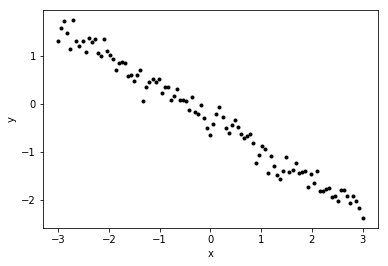

In [2]:
data = np.loadtxt("podatki/sintetični/data_A.txt")
x    = data[:, [0]]
y    = -data[:, [1]]

print(x.shape)
print(y.shape)

plt.figure()
plt.plot(x, y, "k.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Podatki kar dobro spominjajo na premico. 

Poizkusimo poiskati linearni model, ki bo zmanjšal srednjo kvadratično napako.

Na levi sliki prikazujemo <font color="green">vrednosti modela</font> za vse vrednosti $x$ na danem intervalu.

Desna slika pa prikazuje vrednost <i>ostankov</i> $y_i - h(\vec{x}_i)$ .  Bolje, kot se model prilega podatkom, manj povezana bosta odvisna spremenljivka in ostanek.

In [3]:
from scipy.stats import pearsonr
def plot_fit_residual(x, y, yp):

    # Model
    fig, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "g-", label="Model h(x)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend(loc=4)

    # Ostanki
    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend(loc=4)
    plt.show()

[-0.31065728] [[-0.6374012]]


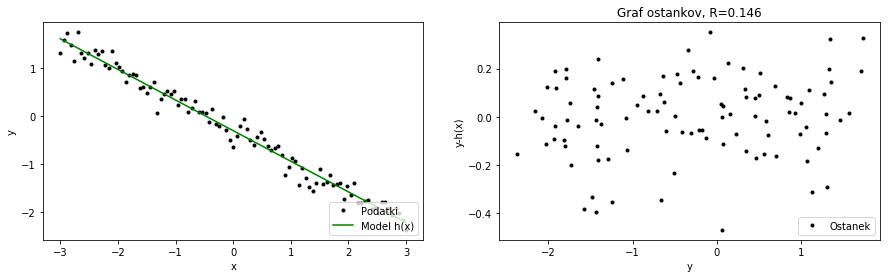

In [4]:
# Ucenje modela
model = LinearRegression()
model.fit(x, y)

print(model.intercept_,model.coef_)


# Napoved vrednosti za podatke
hx = model.predict(x)

plot_fit_residual(x, y, hx)

Izmerimo srednjo kvadratično napako...

In [5]:
mean_squared_error(hx, y)

0.027007427173743746

... ki je enaka varianci razlike. 

In [6]:
np.var(hx-y)

0.027007427173743749

Tako lahko dobimo <i>delež pojasnene variance</i>. Delež v odstotkih si lažje intutivno razlagamo.

In [7]:
explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance: %.2f " % explained_var + "%" )

Explained variance: 97.87 %


<img src="slike/linreg_3.png" width=400/>

## Polinomska regresija

Oglejmo si naslednji motivacijski primer.

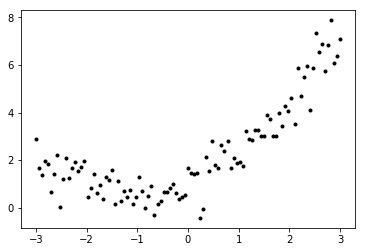

In [8]:
data = np.loadtxt("podatki/sintetični/data_B.txt")
x    = data[:, [0]]
y    = data[:, [1]]

plt.figure()
plt.plot(x, y, "k.")
plt.show()

Že na prvi pogled je jasno, da model premice ne bo zadostoval.  Če skozi podatke potegnemo premico, vidimo, da na nekaterih mesti pošteno zgreši podatke. To vidimo tudi na grafu ostankov, saj je napaka očitno odvisna od velikosti $y$, česar si ne želimo.

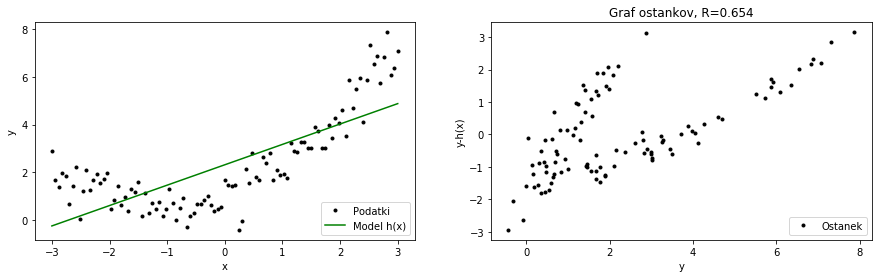

In [9]:
model = LinearRegression()
model.fit(x, y)
hx = model.predict(x)

plot_fit_residual(x, y, hx)

In [10]:
explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance: %.2f " % explained_var + "%" )

Explained variance: 57.23 %


## Model polinomske regresije

Z pomočjo linearnih modelov lahko modeliramo tudi nelinearne odvisnoti, kar je glede na začetne predpostavke nekoliko preseneneljivo. Vrednost $x$ je v tem primeru enodimenzionalna spremenljivka (p=1).

<b>Model polinomske regresije</b> v eni dimenziji je polinom stopnje $D$:

$$ h(\vec{x}) = \beta_1 x + \beta_2 x^2 + ... + \beta_D x^D + \beta_0$$

Učinek dosežemo z ustrezno priredbo prostora. Spremenljivko $x$ preslikamo v vektor tako, da izračunamo ustrezne potence:

$$x \rightarrow (x, x^2, x^3, ... x^D) = \vec{x}$$

V tako sestavljenem prostoru ni polinom nič drugega kot linearna preslikava! 

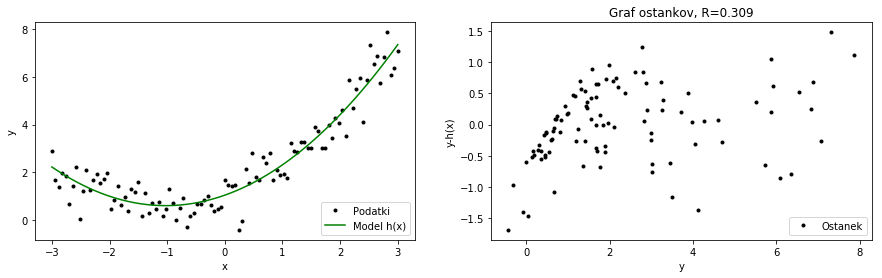

In [11]:
# Iz 1-D sestavimo nov 2-D prostor
X = np.zeros((len(x), 2))
X[:, 0] = x.ravel()
X[:, 1] = x.ravel()**2       

# Učenje
model = LinearRegression()
model.fit(X, y)

# Napoved
hx = model.predict(X)

plot_fit_residual(x, y, hx)

<font color="green"><b>Naredi sam/a.</b></font> Primerjaj pojasnjeno varianco linearnega in polinomskega modela.

In [12]:
# ...

<img src="slike/linreg_4.png" width=600/>

## Pretirano prileganje

Optimalnega modela seveda pogosto ne poznamo. Uporaba pretirano kompleksnih modelov (kompleksnost si lahko predstavljamo kot velikost družine funkcij), lahko vodi v <b>pretirano prileganje</b> (ang. <i>overfitting</i>).

Oglejmo si primer polinoma stopnje 20:

In [13]:
def plot_coefficients(coef):
    coef=coef.ravel()
    D = len(coef)
    plt.title("Parametri modela")
    plt.bar(np.arange(D), coef)
    plt.xticks(np.arange(D))
    plt.grid()
    plt.ylabel("beta")
    plt.xlabel("d")
    plt.show()

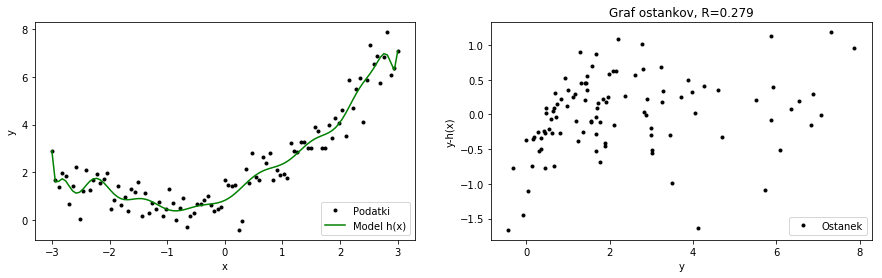

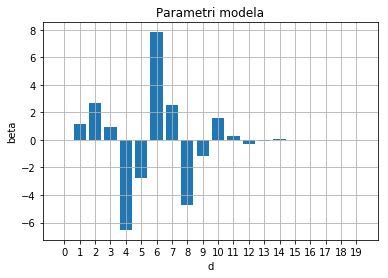

In [14]:
D = 20 # stopnja polinoma
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)

Model se na videz odlično prilega podatkom. Tudi graf ostankov kaže spodbudno sliko. Težava pretiranega prileganja se pojavi pri <b>napovedovanju novih podatkov</b>.

<font color="green"><b>Naredi sam/a.</b></font> izmeri pojasnjeno varianco polinomskega modela.

In [15]:
# ...

## Rešitev: kaznovanje pretirano kompleksnih modelov 



Poleg minimizacije srednje kvadratične napake lahko pri iskanju rešitve tudi <i>kaznujemo kompleksnost modelov</i>. Želimo torej, da so najdeni parametri v geometrijskem smislu čim manjši. Ta postopek je znan tudi kot regularizacija. Stopnjo regularizacije nadzoruje parameter $\alpha$, ki ga določimo kot uporabniki. Dve najpogostejši različici modelov sta:
\begin{itemize}
\item \textbf{Regresija Lasso}

<i>"Kaznovanje manhattanske razdalje vektorja $\vec{\beta}$ od izhodišča"</i
>

$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2 + \alpha \|\vec{\beta}\|_1 $$

<font color="green">Prednost</font>: vrača <b>redke</b> vektorje parametrov $\vec{\beta}$. Večina komponent $\beta_j$ bo enaka 0 - <font color="green">ZELO ZAŽELENO</font>!

<font color="red">Slabost</font>: zahtevno načrtovanje algoritmov za optimizacijo


\item \textbf{Regresija Ridge}
<i>"Kaznovanje evklidske razdalje vektorja $\vec{\beta}$ od izhodišča"</i>
$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2  + \alpha \|\vec{\beta}\|_2 $$

<font color="green">Prednost</font>: Enostaven izračun

<font color="red">Slabost</font>: V splošnem ne vrača redkih vrednosti parametrov.

\end{itemize}

/Users/tomazc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


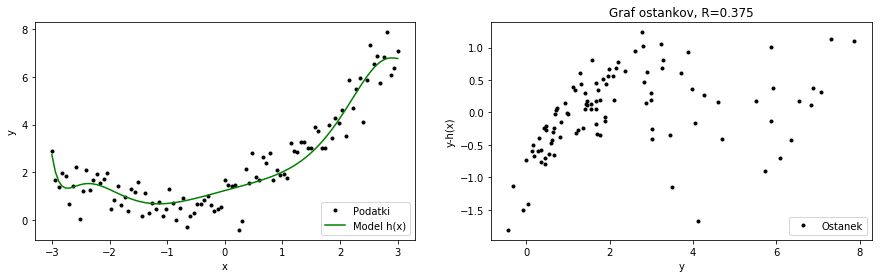

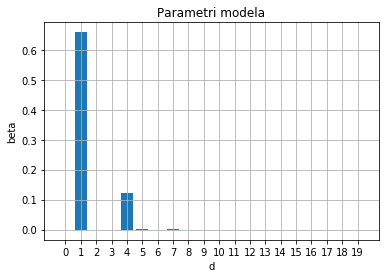

array([  0.00000000e+00,   6.58850431e-01,   0.00000000e+00,
         0.00000000e+00,   1.22399188e-01,   1.87262986e-03,
        -1.16281589e-03,   8.50950453e-04,  -1.20612955e-03,
         5.23047145e-05,  -3.03969640e-05,  -7.80830399e-07,
        -6.91820876e-08,  -5.82661667e-07,   1.66059558e-07,
        -7.52018735e-08,   3.29435443e-08,  -6.33885211e-09,
         5.15017709e-09,  -2.93131818e-10])

In [16]:
D = 20 # stopnja polinoma

# Ustvarimo ustrezen prostor
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = Lasso(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)
model.coef_

<font color="green"><b>Naredi sam/a.</b></font> Kakšen je vpliv parametra ```alpha``` na a) kvaliteto prileganja b) koeficiente modela ? Poizkusi podatke modelirati z regresijo ```Ridge```.

In [17]:
# ... 

Funkcija izgleda "ravno pravi" model za podatke. Na grafu koeficientov (parametrov) vidimo, da so večino teže dobili koeficienti nižjih stopenj polinoma, kar predstavlja manj kompleksen model.

<font color="green"><b>Naredi sam/a.</b></font> Poišči modele polinomske regresije za spodnje tri nabore podatkov. Izberi stopnjo polinoma ter morda vrsto regularizacijskega modela. Nariši graf funkcije in diagram ostankov. Komentiraj rezultate.

Pravilne rešitve (koeficiente in stopnjo polinomov najdeš v ```podatki/sintetični/coefficients_*.txt```

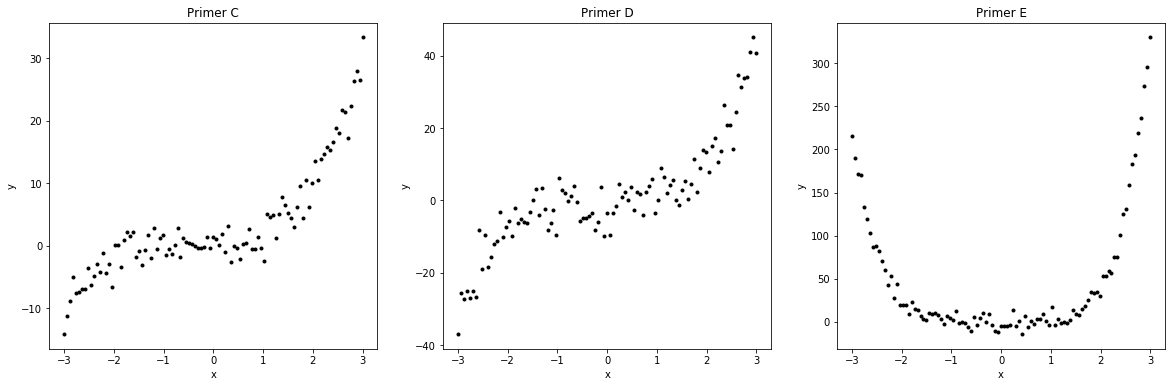

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for example, ax in zip(["C", "D", "E"], axes):
    data = np.loadtxt("podatki/sintetični/data_%s.txt" % example)
    x    = data[:, [0]]
    y    = data[:, [1]]
    
    ax.plot(x, y, "k.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Primer %s" % example)
    
    # ... 

<img src="slike/linreg_5.png" width=400/>

## Uporaba v praksi: analiza sentimenta

Za konec si oglejmo povsem praktičen primer uporabe regresijskih modelov. V podatk
ovni zbirki imamo 1101 recenzij knjig. Vsaka recenzija je sestavljena iz besedila (niz znakov, besed) in ocene med 1 in 5 (1-porazno, 5-odlično).
Izvirna podatkovna zbirka in članek sta na voljo <a href="https://www.cs.jhu.edu/~mdredze/datasets/sentiment/">tukaj</a>.

<br/>
<br/>
<br/>
Primer <font color="green">pozitivne</font> recenzije ene izmed knjig (ocena = 5).

```
I'm a little late in reading this book.  I am trying to pace myself between the movies and the books so that I can enjoy a little Harry Potter at least every year.  
  I think Goblet of Fire is the best in the series, so naturally it would be pretty difficult for Phoenix to live up to that standard.  In Goblet, it feels like Rowling had a fantastic ending in mind, and that drove the writing of the story.  In Phoenix, it seems like the story is key and the ending was simply tacked on to round it out and provide some concluding information.  The major theme seemed to be the Ministry's takeover of Hogwarts.  I found that entire thread to be thoroughly engrossing.  Harry's dreams, however, took on sub-plot status, and then rose to the top for the final conflict.  
  I didn't mind the length of the book, but it did seem to drag in a couple of places.  The gang spent too much time at Grimmauld Place.  I could have also done without Hagrid's giant story.  
  My biggest problem with the book was Dumbledore's secrecy.  Good stories have real roadblocks to keep the hero from achieving his/her goal.  In Phoenix, the cause for most of the confusion was that Dumbledore was reluctant to share certain information with Harry.  He explains his behavior in a most unconvincing way in the final pages.  The secrecy was necessary for the story to take the course that it did, but it lacked good motivation and left me feeling let down.  It reminded me of the natural disaster movie template where the world could be easily saved if not for an arrogant bureaucrat who refuses to listen to the young upstart with all the answers.  It is contrived conflict that is hardly believable.
  Don't get me wrong.  I love the Harry Potter series.  And, perhaps my expectations have risen too high.  I am eagerly awaiting the movie and then I know I will devour book 6 (when I allow myself to read it).  I lose interest in most book series after the first couple of installments.  Harry Potter always leaves me wanting more. 
```

<br/>
Primer <font color="red">negativne</font>  recenzije ene izmed knjig (ocena = 2).

```
This book was horrible.  If it was possible to rate it lower than one star i would have.  I am an avid reader and picked this book up after my mom had gotten it from a friend.  I read half of it, suffering from a headache the entire time, and then got to the part about the relationship the 13 year old boy had with a 33 year old man and i lit this book on fire.  One less copy in the world...don't waste your money.

I wish i had the time spent reading this book back so i could use it for better purposes.  This book wasted my life.
```

Vsako recenzijo predstavimo v prostoru 4000 najpogostejših besed oz. parov besed v podatkovni zbirki (predstavitev bag-of-words). Vsaka komponenta vrstice $x$ (vektorja) šteje, kolikorat se beseda/par besed pojavi v določeni recenziji.

In [19]:
from pickle import load
from os.path import join

def load_data(dset):
    data = dict()

    indir = "podatki/%s/" % dset

    for name in "data", "target", "data_test", "target_test":
        fname = join(indir, name + ".pkl")
        data[name] = load(open(fname, "rb"))

        fname = join(indir, "features.txt")
        fp = open(fname, "rt")
        data["features"] = list(map(lambda l: l.strip(), fp.readlines()))

    return data

books = load_data("books")
X = books["data"]
y = books["target"]


print(str(books['features'][:3]) + '...' + str(books['features'][-3:]))
print(X.todense())
print(y)
print(X.shape, y.shape)

['the', 'a', 'and']...['colors', 'and_most', 'introduced']
[[ 3  4  0 ...,  0  0  0]
 [ 1  1  1 ...,  0  0  0]
 [ 0  0  2 ...,  0  0  0]
 ..., 
 [ 4  2  1 ...,  0  0  0]
 [10  2  5 ...,  0  0  0]
 [ 7  3  3 ...,  0  0  0]]
[1 2 2 ..., 4 5 2]
(1101, 4000) (1101,)


Vrstni red stolpcev v matriki $X$:

In [20]:
features = books["features"]
features

['the',
 'a',
 'and',
 'to',
 'of',
 'this',
 'book',
 'is',
 'in',
 'i',
 'it',
 'for',
 'that',
 'this_book',
 'with',
 'but',
 'on',
 'not',
 'are',
 'have',
 'as',
 'of_the',
 'was',
 'be',
 'you',
 'in_the',
 'an',
 'all',
 'read',
 'from',
 'if',
 'about',
 'one',
 'or',
 'by',
 'at',
 'is_a',
 'more',
 'the_book',
 'what',
 'very',
 'my',
 'who',
 'so',
 'has',
 'like',
 'some',
 'good',
 'would',
 'his',
 'there',
 '<num>',
 'to_the',
 'how',
 'they',
 'he',
 'it_is',
 'out',
 'just',
 'other',
 'book_is',
 'will',
 'much',
 'can',
 'great',
 'this_is',
 'do',
 'no',
 'your',
 'when',
 'up',
 'only',
 'which',
 'and_the',
 'than',
 'on_the',
 'to_be',
 'even',
 'many',
 'had',
 'me',
 'get',
 'time',
 'also',
 'well',
 'their',
 "it's",
 'into',
 'for_the',
 'if_you',
 'them',
 'really',
 'first',
 'were',
 'books',
 'most',
 'reading',
 'then',
 'any',
 "don't",
 'been',
 'with_the',
 'author',
 'as_a',
 'because',
 'way',
 'know',
 'in_a',
 'could',
 'these',
 'people',
 'in_

Priložena je tudi podatkovna zbirka testnih primerov, kjer lahko testiramo napovedno točnost modela na novih podatkih.

In [21]:
X_test = books["data_test"]
y_test = books["target_test"]

<font color="green"><b>Naredi sam/a.</b></font> Uporabi omenjene linearne modele za modeliranje podatkov pri problemu analize sentimenta. Izmeri srednjo kvadratično napako in pojasnjeno varianco na testnih primerih.

In [22]:
# ...

<font color="green"><b>Naredi sam/a.</b></font> Ali lahko ugotoviš, katere besedne zveze močno pozitivno in močno negativno vplivajo na končno oceno recenzije? Namig: pomagaj si z vrednostjo koeficientov za posamezni stolpec.

In [23]:
# ...